In [159]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style="darkgrid")



$$\textbf{Showcasing the reason Numerical Analysis ( Euler's Method of Differential Equation ) to solve a problem } $$



suppose you have a 1st order differential equation   (Differential equation of freefall)  and you are tasked to find the relationship of Velocity , v, over time t given a set of constants (Mass = 68.1, drag coefficient = 12.5 and gravity = 9.81)

 $$ \frac{dv}{dt} = g - \frac{c}{m}v $$
 

One way to do this is to solve the ODE to obtain the function of v(t) over time, which would yield

$$ v = \frac{gm}{c}[1-e^{-\frac{c}{m}t}] $$

With this equation we may then plot it on a graph see output [1] below

    time, t  velocity, m/s
0         0       0.000000
1         2      16.421721
2         4      27.797627
3         6      35.678121
4         8      41.137217
5        10      44.918926
6        12      47.538650
7        14      49.353426
8        16      50.610585
9        18      51.481463
10       20      52.084752
11       22      52.502671
12       24      52.792179
13       26      52.992731
14       28      53.131660
15       30      53.227902


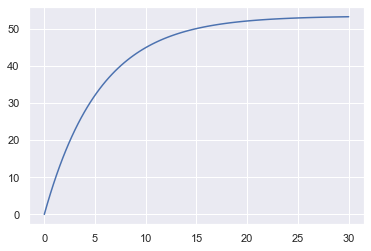

In [160]:
t = np.linspace(0,30, 100)

g = 9.81
c = 12.5
m = 68.1




# plotting
v = ((g*m)/c)*(1 - np.exp(-(c/m)*t))

plt.plot(t,v)




#making tables


def velofunc(t):
    return ((g*m)/c)*(1 - np.exp(-(c/m)*t))

table = pd.DataFrame({
    'time, t':[t for t in range(0,32,2)],
    'velocity, m/s': [velofunc(t) for t in range(0,32,2)],
    
})


print(table)
plt.show()



From there we can then observe that as t approaches above 28 seconds, the velocity will approach a max of 53 m/s

We thereby figured out the answer analytically using mathematical approach of manually solving the ODE and plotting it. Suppose you have an ODE that is hard to solve, how would one approach it. We hereby can use a numerical approach to this, by using numbers and algebra to find an approximate solution. 

This method is called Euler's Method of solving ODE
Using the same example as shown previously
 $$ \frac{dv}{dt} = g - \frac{c}{m}v $$
 
From calculus, we know that

$$ \frac{dv}{dt} = \lim_{\Delta{t}\to 0}\frac{\Delta{v}}{\Delta{t}} $$

(for a very small change in t)

so

$$\frac{\Delta{v}}{\Delta{t}} = \frac{v(t_{i+1}) - v({t_i})}{t_{i+1} - t_{i}} =  g - \frac{c}{m}v  $$

rearranging the equation

$$ v(t_{i+1}) = v({t_i}) +  \left [ g - \frac{c}{m}v({t_i}) \right ] (t_{i+1} - t_{i})$$
we now have 3 sets of terms created that are "iterations" of each other. 
$$ v({t_i}) $$ 
the initial velocity
$$v(t_{i+1}) $$ 
the next velocity point after a "step"
$$(t_{i+1} - t_{i})  $$ 

the change in time from the previous t, also known as a "step"


thereby, by knowing the initial values, we can then obtain the next value, and from the next value, we can then obtain the value after that.
 
 
for example, given the initial value, if t = 0, v(t) = 0 and using the constants provided above (Mass = 68.1, drag coefficient = 12.5 and gravity = 9.81), we can find the value of the velocity at say t = 2

$$ v(t_{i+1}) =0 +  \left [9.81 - \frac{12.5}{68.1}(0) \right ] (2 - 0)  = 19.60$$

now that we know the value of v(t=2), we can then re use it back in the equation and find the value of v(t=4)

$$ v(t_{i+2}) =19.60 +  \left [9.81 - \frac{12.5}{68.1}(19.60) \right ] (4 - 2)  = 32.00$$

repeating this several times we can then plot an "approximate" graph, see below




 

    time, t  velocity, m/s
0         0       0.000000
1         2      19.620000
2         4      32.037357
3         6      39.896213
4         8      44.870026
5        10      48.017917
6        12      50.010194
7        14      51.271092
8        16      52.069105
9        18      52.574162
10       20      52.893809
11       22      53.096111
12       24      53.224147
13       26      53.305179
14       28      53.356465
15       30      53.388922


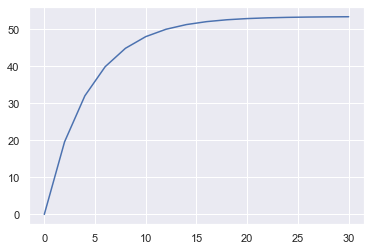

In [161]:

step = 2






#making tables


def velofunc2(v,t1, t2):
    return v + (g - (c/m)*v)*(t2-t1)

time = [t for t in range(0,32, step)]


velocity = []

initialv = 0
initialt = 0
finalt = initialt


for t in time:
    finalt = t
    
    nextvelo = velofunc2(initialv, initialt, finalt)
    velocity.append(nextvelo)
    initialv = nextvelo
    initialt = finalt  


tableforplot = pd.DataFrame({
    'time, t':time,
    'velocity, m/s':velocity,
    
})

print(tableforplot)
plt.plot(time, velocity)
plt.show()



As we can see from our approximated graph, the graph approaches to 53 m/s at t around 22s, this is close to our actual value which is at t = 28, the accurate can be increased by decreasing the step between the time intervals, a final comparison can be seen below

    time, t     V, m/s  V (step of 2)  V (step of 1)  V (step of 0.1)
0         0   0.000000       0.000000       0.000000         0.000000
1         2  16.421721      19.620000      17.819339        15.717186
2         4  27.797627      32.037357      29.697439        26.812227
3         6  35.678121      39.896213      37.615198        34.644415
4         8  41.137217      44.870026      42.893056        40.173296
5        10  44.918926      48.017917      46.411195        44.076232
6        12  47.538650      50.010194      48.756333        46.831384
7        14  49.353426      51.271092      50.319566        48.776295
8        16  50.610585      52.069105      51.361594        50.149243
9        18  51.481463      52.574162      52.056193        51.118431
10       20  52.084752      52.893809      52.519203        51.802598
11       22  52.502671      53.096111      52.827838        52.285564
12       24  52.792179      53.224147      53.033569        52.626498
13       26  52.9927

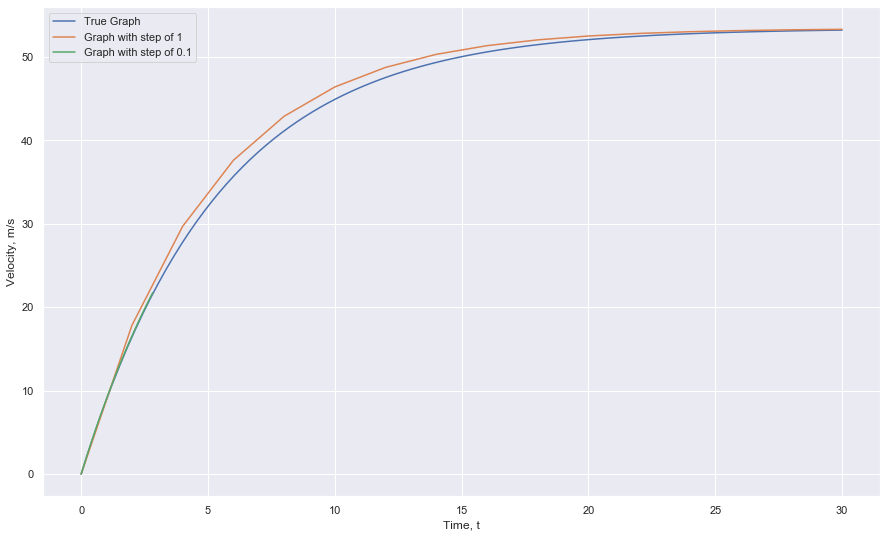

In [164]:


t = np.linspace(0,30, 100)

g = 9.81
c = 12.5
m = 68.1


fig= plt.figure(figsize=(15,9))



# plotting
v = ((g*m)/c)*(1 - np.exp(-(c/m)*t))

line1,= plt.plot(t,v)

#making tables

time = [t for t in range(0,32, 2)]


# different time step
time1 = [t for t in range(0,32, 1)]
time2 = np.linspace(0,30, 320)


# different velocities
velocity1 = []
velocity2 = []

initialv = 0
initialt = 0
finalt = initialt

        
for t in time1:
    finalt = t

    nextvelo = velofunc2(initialv, initialt, finalt)
    velocity1.append(nextvelo)
    initialv = nextvelo
    initialt = finalt  
        
initialv = 0
initialt = 0
finalt = initialt    

for t in time2:
    finalt = t

    nextvelo = velofunc2(initialv, initialt, finalt)
    velocity2.append(nextvelo)
    initialv = nextvelo
    initialt = finalt  



tableforplot = pd.DataFrame({
    'time, t':time,
    'V, m/s':[velofunc(t) for t in time],
    'V (step of 2)': velocity,
    'V (step of 1)': velocity1[0:32:2],
    'V (step of 0.1)': velocity2[0:320:20]
    
})

print(tableforplot)

line2, = plt.plot(time1[0:22:2], velocity1[0:22:2])
line3, = plt.plot(time2[0:22:2], velocity2[0:22:2])
plt.xlabel("Time, t")
plt.ylabel("Velocity, m/s")
plt.legend(
    [line1,line2,line3],
    ['True Graph', 'Graph with step of 1', 'Graph with step of 0.1']
          )
plt.show()



As seen above, by using Euler's Method of solving ODE, provided that your step function is very low, you are able to replicate a graph similar to that of the actual function, this serves to showcase the power of using Numerical Analysis in solving certain mathematical issues